In [2]:
# Remember to update your path
%load_ext autoreload
%autoreload 2

import sys
sys.path.append('C:/Linux_home/Qishi/QishiQR')

from pathlib import Path

from Backtesting.Vectorized.cross_compare import *
from Backtesting.Vectorized.models import *

from Utils.lm import gen_strategy, LM_model
from Utils.MajorContract_split import MajorContracts

import json
import warnings
warnings.filterwarnings(action='ignore')

# ====== Initial Configuration ========

try:
    with open('config.json','r') as f:
        config = json.load(f)
except:
    print("Failed to find the configuration file.")
        
DATA_DIR = config['Tick path']
OUTPUT_DIR = config['Output path']
Strategy_DIR = config['Strategy path']
Major_DIR = config['Major path']
model_order = config['Max model order']
number_of_states = config['State number']
freq = config['Frequency']
offset = config['Offset']
tca = None

# Bu
## Build time series of Major contracts

In [3]:
bu_mj = MajorContracts(symbol='bu', split_time='2016-7-1', topdir='C:/Linux_home/Qishi/tick2016', 
                       maturity={'1606':['2015-11-1','2016-5-1'], 
                                 '1609':['2016-2-1','2016-8-1'], 
                                 '1612':['2016-6-1','2016-11-15'],
                                 '1706':['2016-10-15','2017-1-31']}, 
                       transitions={'1606':'2016-3-1', '1609':'2016-7-1', '1612':'2016-11-1', '1706':'2017-1-1' },
                       freq=freq, offset=offset)
df_bu_train, df_bu_test, ptb = bu_mj.create_major_overlap()

# Save files
for contract in ['1606', '1609']:
    ptb[contract].to_csv(Strategy_DIR+'/Bu_major'+contract +'_' +str(freq) + '_' + str(offset) + '.csv', index=True)
df_bu_train.to_csv(Major_DIR+'/Bu_major_train'+'_' +str(freq) + '_' + str(offset) + '.csv', index=True)
df_bu_test.to_csv(Major_DIR+'/Bu_major_test'+'_' +str(freq) + '_' + str(offset) + '.csv', index=True)

    

bu1606 C:/Linux_home/Qishi/tick2016/bu
0
ID trade_range transition_begin transition_end
1606 ['2015-11-1', '2016-5-1'] 2016-01-01 00:00:00 2016-03-01 00:00:00
probability table:  20160104.0 20160229.0
bu1609 C:/Linux_home/Qishi/tick2016/bu
0
ID trade_range transition_begin transition_end
1609 ['2016-2-1', '2016-8-1'] 2016-03-01 00:00:00 2016-07-01 00:00:00
probability table:  20160229.0 20160630.0
bu1612 C:/Linux_home/Qishi/tick2016/bu
0
ID trade_range transition_begin transition_end
1612 ['2016-6-1', '2016-11-15'] 2016-07-01 00:00:00 2016-11-01 00:00:00
bu1706 C:/Linux_home/Qishi/tick2016/bu
0
ID trade_range transition_begin transition_end
1706 ['2016-10-15', '2017-1-31'] 2016-11-01 00:00:00 2016-12-31 00:00:00


In [4]:
strategy = list(ptb.values())
slm = pd.concat(strategy).groupby(['prior']).sum().reset_index()
slm['signal'] = slm.loc[:, '0':'2'].idxmax(axis=1)

## test on bu1612

,Annualized Volatility,Average Daily Return,Average Negative Return,Average Positive Return,Average Return per Trade,Largest Losing Trade,Largest Winning Trade,Max Drawdown,Profit Factor,Sharpe Ratio,Total Number of Trades,Total Return,Winning Rate
0,0.214291,0.009208,-0.002636,0.001797,0.000216,-0.022822,0.023278,-0.058525,0.681762,10.742264,2726,1.589304,0.353265
1,0.247560,0.011901,-0.002772,0.001805,0.000384,-0.022822,0.023278,-0.039505,0.651304,12.018248,1985,1.761661,0.563728
2,0.266014,0.012774,-0.002816,0.001792,0.000459,-0.022822,0.023278,-0.039409,0.636232,12.005423,1783,1.817564,0.657880
3,0.277273,0.010391,-0.002996,0.001827,0.000339,-0.026522,0.023278,-0.073301,0.609838,9.368691,1962,1.665008,0.535678
4,0.258530,0.005555,-0.002647,0.001968,0.000162,-0.026522,0.023278,-0.088785,0.743581,5.371484,2196,1.355505,0.402550
5,0.225141,0.003494,-0.002355,0.002045,0.000095,-0.026522,0.020755,-0.064927,0.868321,3.880096,2359,1.223634,0.328529
6,0.181482,0.004338,-0.002236,0.002039,0.000109,-0.016469,0.013178,-0.053937,0.912174,5.975359,2547,1.277611,0.298783


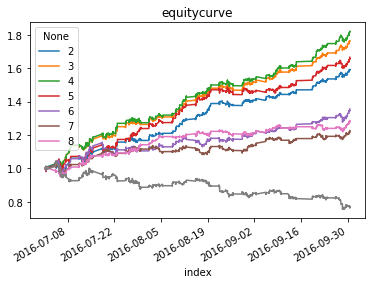

In [5]:
from Backtesting.Vectorized.models import OneContractTest

start = '20160701'
end = '20161001'
max_order=7
tcas = ['None']*max_order

test1 = OneContractTest(DATA_DIR, OUTPUT_DIR,slm)
test1.build('bu', '1612', max_order, freq, offset, start, end, tcas)

test1.run()

test1.plot()
test1.results[0]['benchmark'].plot()
test1.performance

In [6]:
test1.signals[0].signal.unique()

array([0, 2, 1], dtype=int64)

,Annualized Volatility,Average Daily Return,Average Negative Return,Average Positive Return,Average Return per Trade,Largest Losing Trade,Largest Winning Trade,Max Drawdown,Profit Factor,Sharpe Ratio,Total Number of Trades,Total Return,Winning Rate
0,0.327007,0.004603,-0.003902,0.002209,0.000119,-0.056051,0.015168,-0.108101,0.566138,3.519251,1903,1.225561,0.359958
1,0.342243,0.005025,-0.004250,0.002204,0.000175,-0.056051,0.015168,-0.096028,0.518582,3.670940,1406,1.246245,0.552632
2,0.358150,0.005594,-0.004300,0.002216,0.000217,-0.056051,0.015168,-0.096768,0.515324,3.904455,1261,1.274083,0.633624
3,0.401906,0.006882,-0.004608,0.002340,0.000247,-0.056051,0.044677,-0.114257,0.507881,4.281112,1365,1.337238,0.528205
4,0.382338,0.004080,-0.003637,0.002615,0.000131,-0.056051,0.044677,-0.122622,0.718964,2.667725,1523,1.199915,0.397242
5,0.296199,-0.000742,-0.003414,0.002535,-0.000021,-0.068220,0.030071,-0.197314,0.742609,-0.626417,1705,0.963633,0.329619
6,0.282450,-0.001602,-0.002986,0.002635,-0.000042,-0.050413,0.030071,-0.277125,0.882382,-1.417544,1850,0.921525,0.272432


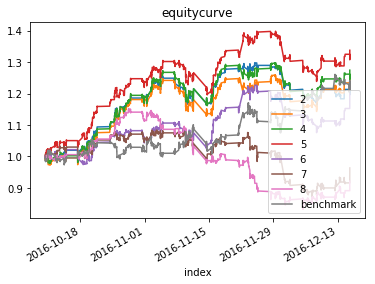

In [13]:
start = '20161001'
end = '20161231'
max_order=7
tcas = ['None']*max_order

test1 = OneContractTest(DATA_DIR, OUTPUT_DIR,slm)
test1.build('bu', '1612', max_order, freq, offset, start, end, tcas)

test1.run()

test1.plot()
test1.results[0]['benchmark'].plot()
plt.legend()
test1.performance

## Test on bu major contracts

,Annualized Volatility,Average Daily Return,Average Negative Return,Average Positive Return,Average Return per Trade,Largest Losing Trade,Largest Winning Trade,Max Drawdown,Profit Factor,Sharpe Ratio,Total Number of Trades,Total Return,Winning Rate
0,0.303799,0.003282,-0.003680,0.002200,0.000080,-0.040180,0.026412,-0.096736,0.597665,2.701154,2430,1.193664,0.383951
1,0.299094,0.003155,-0.003986,0.002154,0.000104,-0.037608,0.026412,-0.119880,0.540345,2.636944,1789,1.186132,0.570710
2,0.308003,0.003882,-0.004025,0.002165,0.000139,-0.037608,0.026412,-0.103228,0.537917,3.150814,1643,1.229029,0.632380
3,0.320843,0.003522,-0.004218,0.002222,0.000120,-0.037608,0.026412,-0.128472,0.526818,2.744516,1728,1.207812,0.545139
4,0.354156,0.001580,-0.003497,0.002453,0.000047,-0.047068,0.026412,-0.126464,0.701540,1.115659,1967,1.093248,0.417895
5,0.362576,0.004264,-0.003160,0.002668,0.000115,-0.023376,0.026763,-0.114588,0.844399,2.939895,2183,1.251561,0.363262
6,0.389748,0.003866,-0.002846,0.002708,0.000097,-0.024286,0.046855,-0.103596,0.951651,2.479652,2359,1.228080,0.305638


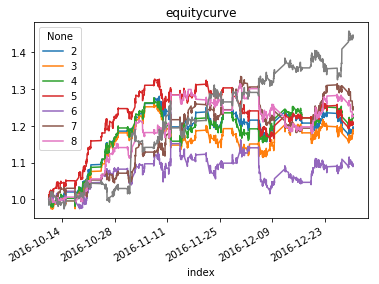

In [8]:
start = '20161001'
end = '20161231'
max_order=7
tcas = ['None']*max_order

test3 = MajorSeriesTest(df_bu_test, OUTPUT_DIR,slm)
test3.build( max_order, offset, start, end, tcas)

test3.run()

test3.plot()
test3.results[0]['benchmark'].plot()
test3.performance

,Annualized Volatility,Average Daily Return,Average Negative Return,Average Positive Return,Average Return per Trade,Largest Losing Trade,Largest Winning Trade,Max Drawdown,Profit Factor,Sharpe Ratio,Total Number of Trades,Total Return,Winning Rate
0,0.262314,0.006478,-0.003198,0.002000,0.000154,-0.040180,0.026412,-0.065766,0.625451,6.173434,5157,1.796735,0.368043
1,0.278342,0.007818,-0.003411,0.001976,0.000255,-0.037608,0.026412,-0.074338,0.579308,7.021549,3775,1.961560,0.567417
2,0.292601,0.008593,-0.003453,0.001972,0.000308,-0.037608,0.026412,-0.062616,0.570934,7.341796,3427,2.056921,0.646046
3,0.302743,0.007133,-0.003631,0.002019,0.000238,-0.037608,0.026412,-0.085396,0.555990,5.890529,3691,1.877391,0.540233
4,0.308530,0.003714,-0.003086,0.002207,0.000110,-0.047068,0.026412,-0.096322,0.715313,3.009253,4163,1.456795,0.410041
5,0.297372,0.003807,-0.002773,0.002366,0.000103,-0.026522,0.026763,-0.098585,0.853319,3.200199,4543,1.468212,0.345366
6,0.298681,0.004130,-0.002556,0.002371,0.000103,-0.024286,0.046855,-0.085415,0.927732,3.456625,4908,1.507955,0.302363


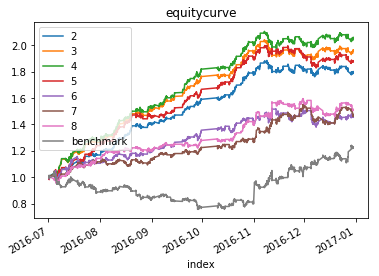

In [9]:
start = '20160601'
end = '20161231'
max_order=7
tcas = ['Fixed']*max_order

test4 = MajorSeriesTest(df_bu_test, OUTPUT_DIR,slm)
test4.build( max_order, offset, start, end, tcas)

test4.run()

test4.plot()
test4.results[0]['benchmark'].plot()
plt.legend()
test4.performance

,Annualized Volatility,Average Daily Return,Average Negative Return,Average Positive Return,Average Return per Trade,Largest Losing Trade,Largest Winning Trade,Max Drawdown,Profit Factor,Sharpe Ratio,Total Number of Trades,Total Return,Winning Rate
0,0.303799,0.003282,-0.003680,0.002200,0.000080,-0.040180,0.026412,-0.096736,0.597665,2.701154,2430,1.193664,0.383951
1,0.299094,0.003155,-0.003986,0.002154,0.000104,-0.037608,0.026412,-0.119880,0.540345,2.636944,1789,1.186132,0.570710
2,0.308003,0.003882,-0.004025,0.002165,0.000139,-0.037608,0.026412,-0.103228,0.537917,3.150814,1643,1.229029,0.632380
3,0.320843,0.003522,-0.004218,0.002222,0.000120,-0.037608,0.026412,-0.128472,0.526818,2.744516,1728,1.207812,0.545139
4,0.354156,0.001580,-0.003497,0.002453,0.000047,-0.047068,0.026412,-0.126464,0.701540,1.115659,1967,1.093248,0.417895
5,0.362576,0.004264,-0.003160,0.002668,0.000115,-0.023376,0.026763,-0.114588,0.844399,2.939895,2183,1.251561,0.363262
6,0.389748,0.003866,-0.002846,0.002708,0.000097,-0.024286,0.046855,-0.103596,0.951651,2.479652,2359,1.228080,0.305638


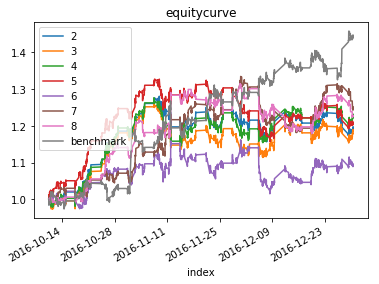

In [10]:
start = '20161001'
end = '20161231'
max_order=7
tcas = ['Fixed']*max_order

test4 = MajorSeriesTest(df_bu_test, OUTPUT_DIR,slm)
test4.build( max_order, offset, start, end, tcas)

test4.run()

test4.plot()
test4.results[0]['benchmark'].plot()
plt.legend()
test4.performance